# **Stundatöflugerð hjá VoN - Vinnubók**

## **3.3.1 Niðurröðun á námskeiðum**
Athugið að í þessum verkþætti koma kennslustofur ekki við sögu. Það eru 5 × 5 hólf í viku,
hvert 2 × 40 mínútur. Þar sem gert er ráð fyrir að hvert námskeið sé kennt tvisvar í viku þá
má gera ráð fyrir 12 – 13 lausum hólfum í fyrri helmingi vikunnar.

(a) Lesið inn upplýsingar um námskeið á haustmisseri úr namskeid.csv. Útbúið net G =
(V, E) þar sem hnútar tákna námskeið og það er leggur milli hnúta u og v ef sami kennari
kennir bæði námskeiðin (að öllu leiti eða að hluta). Hvað eru margir hnútar og leggir í
netinu?

Við byrjum á því að uploada skránum okkar

In [ ]:
from google.colab import files
uploaded_files = files.upload()

Saving namskeid.csv to namskeid.csv
Saving stofur.csv to stofur.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lesum inn stundaskrána
df = pd.read_csv('namskeid.csv')

# Skilgreinum hnúta netsins
G={}
for i in range(0,len(df)):
  G[df.iloc[i,1]]=[]

# Skilgreinum leggi netsins

""" Fall sem skilar true ef sami kennari kennir námskeið í línu i og í línu j """
def Same_Teacher(i,j):
  s = str(df.iloc[i,5])
  t = str(df.iloc[j,5])
  iTeachers = s.split(",")
  jTeachers = t.split(",")
  for x in iTeachers:
    for y in jTeachers:
      if x==y:
        return True
  return False

for i in range(0,len(df)):
  for j in range(i+1,len(df)):
    if Same_Teacher(i,j):
      G[df.iloc[i,1]].append(df.iloc[j,1])
      G[df.iloc[j,1]].append(df.iloc[i,1])

# Finnum fjölda hnúta
print("Fjöldi hnúta: ", len(G))

# Finnum fjölda leggja
def Num_Edge(L):
  numEdge = 0
  for v in L:
    numEdge = numEdge + len(L[v])
  return int(numEdge/2)

print("Fjöldi leggja er: " , Num_Edge(G))



Fjöldi hnúta:  502
Fjöldi leggja er:  1794


(b) Notið gráðuga reikniritið sem lýst er hér: https://en.wikipedia.org/wiki/Greedy_
coloring til að lita netið í a) fyrir öll námskeið á haustmisseri. Hversu marga liti þarf
til að lita netið með þessari aðferð?

In [ ]:
from ast import Lt

# Aðferð sem finnur fyrsta lausa litinn í fylki af litum
def first_available(colors):
    color = 0
    while color in colors:
        color += 1
    return color

# Aðferð sem finnur litun á neti L þegar ítrað er í gegnum þá í röð order
def greedy_coloring(L, order):
    coloring = dict()
    for node in order:
        used_neighbour_colors = {coloring[nbr]
                                 for nbr in L[node]
                                 if nbr in coloring}
        coloring[node] = first_available(used_neighbour_colors)
    return coloring

# Aðferð sem að finnur litunartölu nets út frá litun
def coloring_number(coloring):
  lt = 0
  for u in coloring:
    if coloring[u]>lt:
      lt = coloring[u]
  return lt+1

# Skoðum net allra áfanga háskólans á haustönn
G_Haust = {}

# Skilgreinum hnúta
for i in range(0,len(df)):
  if df.iloc[i,4]=="Haust":
    G_Haust[df.iloc[i,1]]=[]

# Skilgreinum leggi
for i in range(0,len(df)):
  for j in range(i+1,len(df)):
    if df.iloc[i,4]=="Haust" and df.iloc[j,4]=="Haust":
      if Same_Teacher(i,j):
        G_Haust[df.iloc[i,1]].append(df.iloc[j,1])
        G_Haust[df.iloc[j,1]].append(df.iloc[i,1])

# Höfum litun netsins
litun = greedy_coloring(G_Haust, G_Haust)

print("Litunartala netsins G_Haust er: ", coloring_number(litun))


Litunartala netsins G_Haust er:  9


(c) Bætið við þeirri skorðu að skyldunámskeið sem eru á sama misseri í einhverri náms-
braut/kjörsviði (sbr. t.d. TÖL101G og TÖL104G á almenna kjörsviðinu í tölvunarfræði)
séu ekki kennd á sama tíma. Hver verður fjöldi hnúta og leggja nú? Hversu marga liti
þarf til að lita netið með gráðugu aðferðinni í b)?

In [ ]:
# Aðferð sem athugar hvort áfangi í i-tu línu sé skylda á sömu námsbraut og sama námsári og áfangi í j-tu línu
def skylda(i,j):
  s = str(df.iloc[i,7]) # skyldur i
  t = str(df.iloc[j,7]) # skydur j
  if s == "nan" or t == "nan":
    return False
  iSkyldur = s.split("|")
  jSkyldur = t.split("|")
  for x in iSkyldur:
    for y in jSkyldur:
      if(x == y and df.iloc[i,4] == df.iloc[j,4] ):
        return True
  return False;


# Skoðum net með öllum áföngum
print("Fyrir net með öllum áföngum")

GG = {}

# Skilgreinum hnúta netsins
for i in range(0,len(df)):
  GG[df.iloc[i,1]]=[]

# Skilgreinum leggi netsins
for i in range(0,len(df)):
  for j in range(i+1,len(df)):
    if skylda(i,j) or Same_Teacher(i,j): # Leggur ef sami kennari eða skylda
      GG[df.iloc[i,1]].append(df.iloc[j,1])
      GG[df.iloc[j,1]].append(df.iloc[i,1])

# Finnum fjölda hnúta
print("Fjöldi hnúta: ", len(GG))

# Finnum fjölda leggja
print("Fjöldi leggja er: " , Num_Edge(GG))

# Finnum litunartölu
print("Litunartala netsins er: ", coloring_number(greedy_coloring(GG, GG)))




# Skoðum námskeið aðeins á haustönn:
GG_Haust = {}
print("\nÁfangar aðeins á haustönn")

# Skilgreinum hnúta
for i in range(0,len(df)):
  if df.iloc[i,4]=="Haust":
    GG_Haust[df.iloc[i,1]]=[]

# Skilgreinum leggi
for i in range(0,len(df)):
  for j in range(i+1,len(df)):
    if df.iloc[i,4]=="Haust" and df.iloc[j,4]=="Haust":
      if skylda(i,j) or Same_Teacher(i,j):
        GG_Haust[df.iloc[i,1]].append(df.iloc[j,1])
        GG_Haust[df.iloc[j,1]].append(df.iloc[i,1])



# Finnum fjölda hnúta
print("Fjöldi hnúta: ", len(GG_Haust))

# Finnum fjölda leggja
print("Fjöldi leggja er: " , Num_Edge(GG_Haust))

# Finnum litunartölu
print("Litunartala netsins er: ", coloring_number(greedy_coloring(GG_Haust, GG_Haust)))


Fyrir net með öllum áföngum
Fjöldi hnúta:  502
Fjöldi leggja er:  2615
Litunartala netsins er:  27

Áfangar aðeins á haustönn
Fjöldi hnúta:  249
Fjöldi leggja er:  840
Litunartala netsins er:  10


(d) Setjið fram stundatöflur fyrir 2 – 3 valdar námsbrautir, t.d. almenna kjörsviðið í tölv-
unarfræði, hugbúnaðarverkfræði og (hagnýtta) stærðfræði. Leitist við að setja töflurnar
fram með snyrtilegum hætti.

In [ ]:
from tabulate import tabulate
import networkx as nx
import matplotlib.pyplot as plt

# Við höfum þrjár námsbrautir
tol = '1_Tölvunarfræði, BS (180 einingar)_Almenn tölvunarfræði'
hbv = "1_Hugbúnaðarverkfræði, BS (180 einingar)"
stae = "1_Stærðfræði, BS (180 einingar)_Tölvunarfræði"


GGG = {} # Net skylduáfanga á haustönn í þremur ofangreindum áföngum

numlist={} # Heldur utan um línunúmer valdra áfanga í df


# Skilgreinir hnúta netsins
for i in range(0,len(df)):
  study_line = str(df.iloc[i,7]).split("|")
  if df.iloc[i,4] == "Haust":
    if tol in study_line or hbv in study_line or stae in study_line:
      GGG[df.iloc[i,1]]=[]
      numlist[df.iloc[i,1]] = i

# Skigreinir leggi netsins
for i in range(0,len(GGG)):
  for j in range(i+1,len(GGG)):
    x = numlist[list(GGG)[i]]
    y = numlist[list(GGG)[j]]
    if skylda(x,y) or Same_Teacher(x,y):
      GGG[df.iloc[x,1]].append(df.iloc[y,1])
      GGG[df.iloc[y,1]].append(df.iloc[x,1])

# Finnum fjölda hnúta
print("Fjöldi hnúta: ", len(GGG))

# Finnum fjölda leggja
print("Fjöldi leggja er: " , Num_Edge(GGG))

# Finnum litunartölu
litun = greedy_coloring(GGG, GGG)
print("Litunartala netsins er: ", coloring_number(litun))



Fjöldi hnúta:  8
Fjöldi leggja er:  23
Litunartala netsins er:  6


Notum NetworkX pakkann auk matplotlib til þess að skoða netið myndrænt.

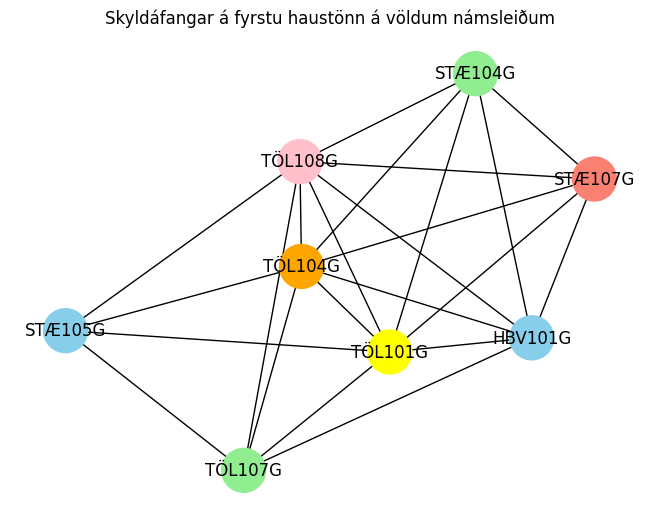

In [ ]:
# Skoðum netið myndrænt
GGG_graph = nx.Graph(GGG)
available_colors = ['skyblue', 'lightgreen','salmon', 'yellow', 'orange', 'pink']
node_colors = ["0"]*len(GGG)
for i in range(0,len(GGG)):
  node_colors[i]=available_colors[litun[list(GGG)[i]]]
nx.draw(GGG_graph, with_labels=True, node_color=node_colors, node_size=1000, font_size=12)
plt.title("Skyldáfangar á fyrstu haustönn á völdum námsleiðum")
plt.show()

Búum til stundatöflu fyrir þessi námskeið. Við höfum að ef tvö námskeið hafa sama lit er ekki til leggur milli þeirra og þ.a.l. geta þau verið kennd á sama tíma. Við höfum sýnt að litunartala netsins GGG að framan er 6 svo í mesta lagi þarf 12 sæti í stundatöfluna þar sem að tvær kennslustundir eru í viku. Við getum því raðað gráðugt námskeiðunum inn í stundaskrána. Ef við g.r.f að fyrri hluti stundatöflu hafi 12 sæti látum við námskeið með lit i fara í sæti i.

In [ ]:
# Búum til stundatöflur
time_table = [[[],[],[],[],[]],[[],[],[],[],[]],[[],[],[],[],[]],[[],[],[],[],[]],[[],[],[],[],[]]]
for x in GGG: # Tímar í fyrri hluta vikunnar
    litur = int(litun[x])
    slot = int(litur%5)
    day = int((litur-(litur%5))/5)
    time_table[slot][day].append(x)
for x in GGG: # Tímar í seinni hluta vikunnar
    litur = int(litun[x])+12
    slot = int(litur%5)
    day = int((litur-(litur%5))/5)
    time_table[slot][day].append(x)



head=["mánudagur", "þriðjudagur", "miðvikudagur", "fimmtudagur", "föstudagur"]

print(tabulate(time_table, headers=head, tablefmt="grid"))

+------------------------+---------------+------------------------+---------------+--------------+
| mánudagur              | þriðjudagur   | miðvikudagur           | fimmtudagur   | föstudagur   |
+========================+===============+========================+===============+==============+
| ['HBV101G', 'STÆ105G'] | ['TÖL108G']   | []                     | ['TÖL101G']   | []           |
+------------------------+---------------+------------------------+---------------+--------------+
| ['STÆ104G', 'TÖL107G'] | []            | []                     | ['TÖL104G']   | []           |
+------------------------+---------------+------------------------+---------------+--------------+
| ['STÆ107G']            | []            | ['HBV101G', 'STÆ105G'] | ['TÖL108G']   | []           |
+------------------------+---------------+------------------------+---------------+--------------+
| ['TÖL101G']            | []            | ['STÆ104G', 'TÖL107G'] | []            | []           |
+---------

## **3.3.2 Niðurröðun námskeiða í kennslustofur**

(a) Með gráðugu aðferðinni í 3.3.1 getur fjöldi námskeiða í sama tímahólfi hæglega orðið
meiri en fjölda kennslustofa sem er til umráða. Breytið gráðuga reikniritinu þannig að
það séu mest s_max hnútar litaðir í sama lit. Hver er minnsti fjöldi lita sem þarf til, þegar
s_max er á bilinu 28 – 32?

In [ ]:
from ast import Lt
def first_available(colors):
    color = 0
    while color in colors:
        color += 1
    return color

# Finnur litun ef aðeins limit fjöldi má vera afhverjum lit.
def greedy_coloring_limit(L, order, limit):
    coloring = dict()
    color_count = [0]*len(L)
    for node in order:
        used_neighbour_colors = {coloring[nbr]
                                 for nbr in L[node]
                                 if nbr in coloring}
        """
        Hérna bætum við skorðunni að ef það eru of margir hnútar af næsta lit
        bætum við honum við mengi lita nágranna þ.e.a.s ólöglegra lita. Við upp-
        færum svo fjöldan af hnútum af hverjum lit.
        """
        while color_count[first_available(used_neighbour_colors)] >= limit:
          used_neighbour_colors.add(first_available(used_neighbour_colors))

        color = first_available(used_neighbour_colors)
        coloring[node] = color
        color_count[color] = color_count[color]+1
    return coloring

def coloring_number(coloring):
  lt = 0
  for u in coloring:
    if coloring[u] > lt:
      lt = coloring[u]
  return lt+1

print("Litunartala nets áfanga á haustönn með mismunani gildum á limit.\n")
for i in range(28,33):
  print("Litunartala netsins með limit =",i," er : ", coloring_number(greedy_coloring_limit(GG_Haust, GG_Haust,i)))

print("\nLitunartala nets áfanga á öllu árinu með mismunani gildum á limit.\n")
for i in range(28,33):
  print("Litunartala netsins með limit =",i," er : ", coloring_number(greedy_coloring_limit(GG, GG,i)))

Litunartala nets áfanga á haustönn með mismunani gildum á limit.

Litunartala netsins með limit = 28  er :  13
Litunartala netsins með limit = 29  er :  12
Litunartala netsins með limit = 30  er :  12
Litunartala netsins með limit = 31  er :  12
Litunartala netsins með limit = 32  er :  12

Litunartala nets áfanga á öllu árinu með mismunani gildum á limit.

Litunartala netsins með limit = 28  er :  27
Litunartala netsins með limit = 29  er :  27
Litunartala netsins með limit = 30  er :  27
Litunartala netsins með limit = 31  er :  27
Litunartala netsins með limit = 32  er :  27


(b) Stillið upp tvíhlutaneti H þar sem hnútar svara til námskeiða annars vegar og kennslu-
stofa hins vegar. Setjið legg milli námskeiðs n og stofu s ef fjöldi nemenda í n er ekki
meiri en fjöldi sæta í s. Athugið að tölur yfir nemendafjölda miða við fjölda sem luku
námskeiði. Þar sem fjöldi í námskeiðum í upphafi misseris er oft talsvert meiri en þetta
þá þurfið þið að margfalda nemendafjöldann með vel völdum fasta. Fjöldatala −1 táknar
að námskeiðið hefur ekki verið kennt síðustu 2 ár. Í þessum tilfellum má gera ráð fyrir
að viðkomandi námskeið sé fámennt. Hver er fjöldi hnúta og fjöldi leggja í H?

Farið var yfir öll námskeið sem höfundar höfðu klárað og skoðað upphaflegan skráningarfjöldan miðað við endanlega fjölda sem stóðst áfangann. Látum $U_x$ tákna upphaflegan skráningarfjölda og $E_x$ fjölda nemenda sem stóðust endanlega ákveðið námskeið x. Við höfum samband

$U_x=c\cdot E_x$

þar sem $c$ er einhver fasti. Ef við látum $X$ tákna öll námskeið sem höfundar hafa tekið fæst að

$\min\{c:U_x=c\cdot E_x \text{ fyrir eitthvert } x\in X\} = 1.20$
$\max\{c:U_x=c\cdot E_x \text{ fyrir eitthvert } x\in X\} = 3.23$
$\text{mean}\{c:U_x=c\cdot E_x \text{ fyrir eitthvert } x\in X\} = 2.20$
$\text{median}\{c:U_x=c\cdot E_x \text{ fyrir eitthvert } x\in X\} = 2.12$

Af þessu má því velja fasta c þ.a. $U\approx c\cdot E$ fyrir öll námskeið. Við athugum hinsvegar að

In [ ]:
# Lesum inn stundaskrána
ds = pd.read_csv('stofur.csv')

max_student_count=max(df.iloc[:,6])

max_room_size = 0

for i in range(len(ds)):
  lines = str(ds.iloc[i,0]).split("\t")
  size = int(lines[1])
  max_room_size = max(max_room_size,size)

print("Mestur fjöldi nemenda sem stóðust eitthvert námskeið: ", max_student_count)
print("Fjöldi sæta í stærstu kennslustofu: ", max_room_size)
print("Hlutfall milli mesta fjölda sæta og mesta fjölda nemenda sem stóðust: ", max_room_size / max_student_count)

Mestur fjöldi nemenda sem stóðust eitthvert námskeið:  190
Fjöldi sæta í stærstu kennslustofu:  296
Hlutfall milli mesta fjölda sæta og mesta fjölda nemenda sem stóðust:  1.5578947368421052


Hér má því sjá að ef $c\geq 1.56$ þá fáum við námskeið sem passar ekki í neina stofu. Út frá þessu og mælingum að framan veljum við þá $c=1.5$ sem fasta til þess að áætla upphaflegan skráningarfjölda.

In [ ]:
# Smíðum net
S = {}

# Hnútar sem tákna námskeið skilgreindir
for i in range(0,len(df)):
  S[df.iloc[i,1]]=[]

# Hnútar sem tákna kennslustofur auk leggja skilgreindir
for i in range(0, len(ds)):
  S[ds.iloc[i,0]]=[]
  for j in range(0, len(df)):
    size = str(ds.iloc[i,0]).split("\t")
    """
    Ekki þarf að tækla sérstaklega tilvikin þegar fjöldatalan er -1. Við gerum þá ráð fyrir að námskeiðin séu
    fámenn og komist þ.a.l. fyrir í sérhverri stofu. Nú því -1 < stærð stofu fyrir sérhverja stofu er settur
    leggur milli námskeiðsins og sérhverrar stofur sem er það sem við viljum.
    """
    if int(df.iloc[j,6])*1.5 <= int(size[1]) :
      S[df.iloc[j,1]].append(ds.iloc[i,0])
      S[ds.iloc[i,0]].append(df.iloc[j,1])

# Finnum fjölda hnúta
print("Fjöldi hnúta: ", len(S))

# Finnum fjölda leggja
print("Fjöldi leggja er: " , Num_Edge(S))

# Finnum litunartölu
litun_S = greedy_coloring(S, S)
print("Litunartala netsins er: ", coloring_number(litun_S))

Fjöldi hnúta:  534
Fjöldi leggja er:  12504
Litunartala netsins er:  2


(c) Ákvarðið stærstu spyrðingu í H með viðeigandi reikniriti. Sjá t.d. yfirfærslu frá mesta
flæði (greinar 10.1, 10.3 og 11.3 í Erickson ásamt https://en.wikipedia.org/wiki/
Ford-Fulkerson_algorithm).

In [ ]:
import collections

# Yfirfærum S í net SS sem er sett fram með fylki þ.a.

SS = [[0 for _ in range(534)] for _ in range(534)]

for i in range(0,502):
  for j in range(502,534):
    size = int(str(ds.iloc[j-502,0]).split("\t")[1])
    if df.iloc[i,6]*1.5<=size:
      SS[i][j]=1


class Graph:
	def __init__(self,graph):

		self.graph = graph
		self.nmsk = len(graph)
		self.stofur = len(graph[0])

	def bpm(self, u, matchR, seen):

		for v in range(self.stofur):

			if self.graph[u][v] and seen[v] == False:

				seen[v] = True
				if matchR[v] == -1 or self.bpm(matchR[v],
											matchR, seen):
					matchR[v] = u
					return True
		return False

	# Finnur stærstu spyrðingu
	def maxBPM(self):
		matchR = [-1] * self.stofur

		result = 0
		for i in range(self.nmsk):

			seen = [False] * self.stofur

			if self.bpm(i, matchR, seen):
				result += 1
		return result, matchR


g = Graph(SS)
print("Stærsta spyrðing er: ", g.maxBPM()[0])


Stærsta spyrðing er:  32


(d) Setjið fram stundatöflur fyrir valdar námsbrautir eins og þið gerðuð í 3.3.1.

Byrjum á því að velja kennslustofur fyrir námskeiðin. Fyrir sérhvern lit í netinu búum við til tvíhlutanet eins og að framan þar sem að námskeiðin eru þau með þann ákveðna lit. Við finnum svo stærstu spyrðingu í tvíhlutanetinu en hún útlhlutar sérhverju námskeiði kennslustofu.

In [ ]:
# Skilar fylki sem segir til um fjölda hnúta af hverjum lit

def num_of_color(coloring):
  num=[0]*coloring_number(coloring)
  for x in coloring:
    num[coloring[x]] = num[coloring[x]] + 1
  return num

# Við höfum úr 3.3.1. d) að skylduáfangar á fyrstu haustönn eru 8 talsins. Við höfum þá

for i in range(coloring_number(litun)):
  number_of_nodes = (num_of_color(litun))[i]
  H=[[0 for _ in range(32+number_of_nodes)] for _ in range(32+number_of_nodes)]

  # GGG er net með öllum námskeiðum úr völdum námsbrautum
  counter = 0
  courses_in_H = [""]*number_of_nodes
  for node in GGG:
    if litun[node]==i:
      courses_in_H[counter]=node
      for j in range (number_of_nodes,32+number_of_nodes):
        size_classroom = int(str(ds.iloc[j-number_of_nodes,0]).split("\t")[1])
        x = numlist[node]
        if df.iloc[x,6]*1.5<=size_classroom:
          H[counter][j]=1
      counter = counter + 1

  h = Graph(H)

  for i in range(0,32+number_of_nodes):
    if (h.maxBPM()[1])[i]!=-1:
      print("Námskeið ", courses_in_H[(h.maxBPM()[1])[i]]," er kennt í kennslustofu ", ds.iloc[i-number_of_nodes,0]  )


Námskeið  STÆ105G  er kennt í kennslustofu  HB-1	296
Námskeið  HBV101G  er kennt í kennslustofu  HB-2	203
Námskeið  STÆ104G  er kennt í kennslustofu  HB-1	296
Námskeið  TÖL107G  er kennt í kennslustofu  HB-2	203
Námskeið  STÆ107G  er kennt í kennslustofu  HB-1	296
Námskeið  TÖL101G  er kennt í kennslustofu  HB-1	296
Námskeið  TÖL104G  er kennt í kennslustofu  HB-1	296
Námskeið  TÖL108G  er kennt í kennslustofu  HB-1	296


## **3.3.3 Lágmörkun á fjölda tímahólfa**

SAT (satisfiability) verkefnið er NP-fullkomið fyrir klausur með 3 eða fleiri breytum og því
er ekkert SAT reiknirit þekkt sem keyrir í margliðutíma. Það kann því að koma á óvart að
oft er hægt að leysa gríðarstór SAT verkefni, verkefni með tugþúsundir breyta og milljónir
klausa, á skömmum tíma. Ástæðan er sú að mörg þeirra SAT verkefna sem koma upp í
praxís eru tiltölulega auðleyst, þ.e. ”slæm” tilfelli koma sjaldan upp. Á undanförnum árum
hefur verið hröð framþróun í reikniritum fyrir SAT verkefni og þess vegna verður sífellt
algengara að tækla torleyst verkefni með því að yfirfæra þau á SAT frekar en að útbúa
sérhæft reiknirit fyrir verkefnið.

Hér notum við SAT pakka sem kallast Glucose3 til að raða námskeiðum í stundatöflu.
Það gerir okkur jafnframt kleift að ákvarða lágmarksfjölda tímahólfa sem þarf (ef Glucose3
skilar að SAT verkefnið sé fullnægjanlegt fyrir k liti en ófullnægjanlegt fyrir k − 1 liti þá er
það sönnun á að k sé litunartala netsins).

**(a)** Sýnið hvernig hægt er að yfirfæra k-litun á neti G yfir á SAT verkefni með því að lýsa
hvernig neti G = (V, E) er varpað í Boolformúlu φ þannig að G sé k-litanlegt þá og því
aðeins að φ sé fullnægjanleg. Ábending: Hverjar eru breytur og skorður litunarverkefn-
isins? Hvernig má kóða þær í Boolformúlu? Skoðið t.d. 3 liti til að byrja með.

Við getum yfirfært k-litunarverkefnið yfir á SAT verkefni með eftirfarandi hætti:

Við byrjum á því að skilgreina breytu $x_{v,j}$ fyrir hvern hnút $v\in V$ og fyrir hvern lit frá 1 upp í k. $x_{v,j}$ tekur gildið satt ef og aðeins ef hnútur $v$ er litaður með lit i.

Eftirfarandi eru skorður fyrir litun:



*   **Hver hnútur verður a.m.k. að hafa einn lit**: Við verðum að tryggja að fyrir hvern hnút $v$ fái hann einhvern af $k$ litunum. Við gerum þetta með því að búa til klausa sem inniheldur allar litabreytur fyrir hnútinn, þ.e. $y_v=(x_{v,1}\vee x_{v,2} \vee \cdots \vee x_{v,k})$
*   **Hver hnútur má í mesta lagi hafa einn lit** Til þess að tryggja að enginn hnútur sé með meira en einn lit bætum við klausa við hvert mögulegt litapar $(i,j)$ fyrir hvern hnút, þar sem $i \neq j$: $y_{v_{ij}}=(\neg x_{v,i} \vee \neg x_{v,j})$
*   **Engir tengdir hnútar mega hafa sama litinn** Fyrir hvern legg $(v,w) \in E$ og hvern lit $i$, þá búum við til klausa sem tryggir að hnútarnir sem leggurinn tengir deili ekki lit: $y_{(v,w)_i}=(\neg x_{v,i} \vee \neg x_{w,i})$.  

Af þessu skilgreinum við boolformúlu

$$\varphi = \left(\bigwedge_{v\in V}y_v\right)\land \left(\bigwedge_{v\in V}\bigwedge_{i\neq j}y_{v_{ij}}\right)\land \left(\bigwedge_{(v,w)\in E}\bigwedge_{i=0}^{k-1}y_{(v,w)_i}\right)$$

sem er fullnægjanleg þ.þ.a.a. netið er k-litanlegt.

Við tökum sem dæmi $K_3$ netið. Það er augljóslega 3-litanlegt og ef við köllum hnútana $a$, $b$ og $c$ og litina 0, 1 og 2 og g.r.f. að $x_{a,0}=1$, $x_{b,1}=1$ og $x_{c,2}=1$ og $x_{v,i}=0$ fyrir öll önnur gildi þá er $\varphi$ sönn.


In [ ]:
pip install python-sat[aiger,approxmc,cryptosat,pblib]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.1 MB/s eta 0:00:00
  Created wheel for pypblib: filename=pypblib-0.0.4-cp310-cp310-linux_x86_64.whl size=2973395 sha256=a56cd960817e7f3468fd7f4198abeac512dc0f0439318a4b6dcdf9cdfe139108
  Stored in directory: /root/.cache/pip/wheels/a8/3d/9c/b980a09d6084eaeb9b336edbe20371c53c2550226daeee2025
Successfully built pypblib
  Attempting uninstall: bidict
    Found existing installation: bidict 0.23.1
    Uninstalling bidict-0.23.1:
      Successfully uninstalled bidict-0.23.1


(b) Sýnið hvernig hægt er með einföldum hætti að taka tillit til hámarksfjölda kennslustofa
sem eru í boði með því að bæta klausum (og e.t.v. breytum) við φ þannig að mest
séu $s_\max$ hnútar séu litaðir sama lit. Hversu margar breytur og skorður bætast við φ?
Ábending: Þið þurfið ekki að hafa áhyggjur af því hvort aðferðin ykkar sé nothæf fyrir
stór tilvik af stundatöfluverkefninu sbr. athugasemd hér að neðan.

Við viljum að fyrir fyrir sérhvern lit $i$ gildi að $$\sum_{v\in V}x_{v,i}\leq s_{\max} $$
Við tökum þá samantekt úr $W \subset V$ með $s_\max+1$ staki. Ef klausan
$$
\eta(W,i) = \bigwedge_{w\in W}x_{w,i}
$$
er sönn fyrir einhvern lit $i$ og einhverja samantekt W þá vitum við að það eru fleiri en $s_\max$ hnútar af lit $i$. Ef við látum $X$ vera mengi allra samantekta, sem eru $\binom{|V|}{s_\max+1}$ talsins, þá fæst að það eru fleiri en $s_\max$ hnútar af einhverjum lit ef
$$
\xi = \bigvee_{W\in X}\bigvee_{i=0}^{k-1}\eta(W,i)
$$
er sönn. Þá bætum við
$$
\neg \xi = \bigwedge_{W\in X}\bigwedge_{i=0}^{k-1}\neg\eta(W,i)
$$
við klausuna til þess að tryggja hámarksfjölda hnúta af hverjum lit.



(c) Setjið SAT verkefnið sem svarar til niðurröðunar á námskeiðum á haustmisseri upp í PySAT og leysið með Glucose3 pakkanum (sjá athugasemdir hér að neðan). Ákvarðið minnsta fjölda lita sem þarf til að lita netið og leysið svo tilsvarandi spyrðingarverkefni til að úthluta námskeiðum kennslustofum.

PySAT skilar hvort það sé fullnægjanlegt fyrir k svo við íitrum yfir k þangað til k>13 því þá vitum við að keyrsla hefur mistekist þar sem við höfðum sýnt með gráðugu reikniriti að hægt væri að lita netið með 13 litum

In [ ]:
from pysat.solvers import Glucose3
from pysat.formula import CNF
from pysat.card import *

def create_cnf(graph, k, max_color_vertices):
    cnf = CNF()
    var = {}
    counter = 1

    # Eintæk vörpun sem varpar (hnút,lit) í náttúrulega tölu
    for node in graph:
        var[node] = [counter + i for i in range(k)]
        counter += k

    # Aðeins einn litur á hnút
    for node, vars in var.items():
        cnf.append(vars)
        for i in range(len(vars)):
            for j in range(i + 1, len(vars)):
                cnf.append([-vars[i], -vars[j]])

    # Aðlægir hnútar ekki með sama lit
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            for i in range(k):
                cnf.append([-var[node][i], -var[neighbor][i]])

    top_id = max(var[node][-1] for node in var) + 1000

    for color_index in range(k):
        color_vars = [var[node][color_index] for node in graph]
        cardinality_clause = CardEnc.atmost(lits=color_vars, bound=max_color_vertices, top_id=top_id)
        cnf.extend(cardinality_clause.clauses)

        top_id += len(color_vars) * 100

    return cnf, var

# Endurkvæmt reiknirit sem athugar hvort boolformúla sé uppfyllt fyrir gefið k
def k_litun(graph, limit, k):
        if k > 13:
          print("Gekk ekki upp")
          return
        solver = Glucose3()
        cnf, var_mapping = create_cnf(graph, k, limit)
        for clause in cnf:
            solver.add_clause(clause)
        if solver.solve():
            model = solver.get_model()
            solution = {node: None for node in graph}
            for node, vars in var_mapping.items():
                for i, var in enumerate(vars):
                    if model[var - 1] > 0:
                        solution[node] = i + 1
                        break
            if all(color is not None for color in solution.values()):
                print(f"Netið er {k}-litanlegt")
                return solution
        else:
            print(f"Netið er ekki {k}-litanlegt")
            solver.delete()
            return k_litun(graph, limit, k+1)


litun_Haust = k_litun(GG_Haust, 32, 1)
print("\nNetið hefur litun\n")
print(litun_Haust)

Netið er ekki 1-litanlegt
Netið er ekki 2-litanlegt
Netið er ekki 3-litanlegt
Netið er ekki 4-litanlegt
Netið er ekki 5-litanlegt
Netið er ekki 6-litanlegt
Netið er ekki 7-litanlegt
Netið er ekki 8-litanlegt
Netið er ekki 9-litanlegt
Netið er 10-litanlegt

Netið hefur litun

{'BYG101M': 4, 'BYG120F': 2, 'BYG301G': 4, 'BYG302G': 2, 'BYG501G': 4, 'BYG503G': 3, 'EÐL101G': 2, 'EÐL101M': 3, 'EÐL102G': 5, 'EÐL102M': 4, 'EÐL107G': 4, 'EÐL108G': 6, 'EÐL114F': 10, 'EÐL124F': 3, 'EÐL301G': 2, 'EÐL302G': 4, 'EÐL306G': 6, 'EÐL505F': 3, 'EÐL506G': 1, 'EÐL509M': 4, 'EÐL515M': 10, 'EÐL520M': 6, 'EÐL521G': 3, 'EÐL527M': 4, 'EÐL528M': 2, 'EÐL701M': 6, 'EFN103G': 6, 'EFN104G': 5, 'EFN106G': 6, 'EFN108G': 6, 'EFN109G': 4, 'EFN110G': 1, 'EFN112G': 4, 'EFN113G': 3, 'EFN114G': 8, 'EFN115F': 6, 'EFN301G': 5, 'EFN304G': 2, 'EFN307G': 2, 'EFN309G': 3, 'EFN310G': 4, 'EFN311G': 1, 'EFN313G': 1, 'EFN315G': 5, 'EFN509G': 6, 'EFN513M': 3, 'EFN514M': 1, 'EFN515M': 4, 'EFN516M': 8, 'EVF301G': 4, 'EVF302G': 3, 'EVF502

Ákvörðum nú stundatöflur fyrir námskeiðin

In [ ]:
classroom_for_class = {}

# Línunúmer námskeiðs í df
node_number = {}
for i in range(len(df)):
  node_number[df.iloc[i,1]] = i

for i in range(coloring_number(litun_Haust)):
  number_of_nodes = (num_of_color(litun_Haust))[i]
  #Búið til tvíhlutanet með öllum námskeiðum sem eru með lit i
  H=[[0 for _ in range(32+number_of_nodes)] for _ in range(32+number_of_nodes)]


  counter = 0
  courses_in_H = [""]*number_of_nodes
  for node in GG_Haust:
    if litun_Haust[node]==i:
      courses_in_H[counter]=node
      for j in range (number_of_nodes,32+number_of_nodes):
        size_classroom = int(str(ds.iloc[j-number_of_nodes,0]).split("\t")[1])
        x = node_number[node]
        if df.iloc[x,6]*1.5<=size_classroom:
          H[counter][j]=1
      counter = counter + 1

  # Fundin stærsta spyrðing
  h = Graph(H)

  # Skilað í hvaða kennslustofu námskeið er í
  for i in range(0,32+number_of_nodes):
    if (h.maxBPM()[1])[i]!=-1:
      print("Námskeið ", courses_in_H[(h.maxBPM()[1])[i]]," er kennt í kennslustofu ", ds.iloc[i-number_of_nodes,0]  )
      classroom_for_class[courses_in_H[(h.maxBPM()[1])[i]]]=ds.iloc[i-number_of_nodes,0]

Námskeið  STÆ535M  er kennt í kennslustofu  A-050	30
Námskeið  STÆ534M  er kennt í kennslustofu  A-051	24
Námskeið  STÆ537M  er kennt í kennslustofu  A-052	36
Námskeið  STÆ302G  er kennt í kennslustofu  HB-1	296
Námskeið  TÖL103M  er kennt í kennslustofu  HB-2	203
Námskeið  TÖL029M  er kennt í kennslustofu  HB-3	142
Námskeið  STÆ536M  er kennt í kennslustofu  HB-4	90
Námskeið  STÆ528M  er kennt í kennslustofu  HT-101	60
Námskeið  STÆ310M  er kennt í kennslustofu  HT-102	180
Námskeið  RAF506G  er kennt í kennslustofu  HT-103	100
Námskeið  RAF504G  er kennt í kennslustofu  HT-104	100
Námskeið  HBV501G  er kennt í kennslustofu  HT-105	180
Námskeið  STÆ012F  er kennt í kennslustofu  N-121	22
Námskeið  LÍF112F  er kennt í kennslustofu  N-128	24
Námskeið  REI506M  er kennt í kennslustofu  N-129	24
Námskeið  RAF214F  er kennt í kennslustofu  N-130	35
Námskeið  RAF054F  er kennt í kennslustofu  N-131	55
Námskeið  EFN110G  er kennt í kennslustofu  N-132	150
Námskeið  HBV506M  er kennt í kennslu

Athuga hvort hverju námskeiði er úthlutað kennslustofu.

In [ ]:
print("Fjöldi námskeiða sem fá úthlutaða kennslustofu: ", len(classroom_for_class))
print("Fjöldi námskeiða: ", len(GG_Haust))
if len(classroom_for_class) == len(GG_Haust):
  print("Öllum námskeiðum var úthlutað kennslustofu")
else:
  print("Skipting í kennslustofur tókst ekki")

Fjöldi námskeiða sem fá úthlutaða kennslustofu:  249
Fjöldi námskeiða:  249
Öllum námskeiðum var úthlutað kennslustofu


(d) Sýnið stundatöflur fyrir valdar námsbrautir/kjörsvið annars vegar og kennslustofur hins vegar. Berið stuttlega saman lausnina sem þið fengið hér við lausnina sem fékkst í 3.3.2.

In [ ]:
# Við búum til stundatöflur fyrir völdu námsbrautirnar eins og að framan

time_table2 = [[[],[],[],[],[]],[[],[],[],[],[]],[[],[],[],[],[]],[[],[],[],[],[]],[[],[],[],[],[]]]
for x in GGG: # Tímar í fyrri hluta vikunnar
    litur = int(litun_Haust[x])
    slot = int(litur%5)
    day = int((litur-(litur%5))/5)
    time_table2[slot][day].append(x)
for x in GGG: # Tímar í seinni hluta vikunnar
    litur = int(litun_Haust[x])+12
    slot = int(litur%5)
    day = int((litur-(litur%5))/5)
    time_table2[slot][day].append(x)



head=["mánudagur", "þriðjudagur", "miðvikudagur", "fimmtudagur", "föstudagur"]

print(tabulate(time_table2, headers=head, tablefmt="grid"))

+------------------------+---------------+------------------------+---------------+--------------+
| mánudagur              | þriðjudagur   | miðvikudagur           | fimmtudagur   | föstudagur   |
+========================+===============+========================+===============+==============+
| []                     | ['TÖL104G']   | []                     | []            | ['TÖL108G']  |
+------------------------+---------------+------------------------+---------------+--------------+
| []                     | ['HBV101G']   | []                     | ['STÆ105G']   | ['TÖL101G']  |
+------------------------+---------------+------------------------+---------------+--------------+
| ['STÆ107G', 'TÖL107G'] | ['STÆ104G']   | []                     | ['TÖL104G']   | []           |
+------------------------+---------------+------------------------+---------------+--------------+
| []                     | ['TÖL108G']   | []                     | ['HBV101G']   | []           |
+---------

Og kennslustofurnar yrðu eftirfarandi

In [ ]:
for x in GGG:
  print("Námskeið ", x," er kennt í kennslustofu ", classroom_for_class[x] )

Námskeið  HBV101G  er kennt í kennslustofu  V02-158	75
Námskeið  STÆ104G  er kennt í kennslustofu  HB-1	296
Námskeið  STÆ105G  er kennt í kennslustofu  HT-103	100
Námskeið  STÆ107G  er kennt í kennslustofu  HB-1	296
Námskeið  TÖL101G  er kennt í kennslustofu  HB-1	296
Námskeið  TÖL104G  er kennt í kennslustofu  HB-2	203
Námskeið  TÖL107G  er kennt í kennslustofu  HT-105	180
Námskeið  TÖL108G  er kennt í kennslustofu  Gr-F01	210


In [ ]:
from datetime import datetime,timedelta
print(datetime.now()+timedelta(days = 31))

2024-08-04 12:40:03.891896
